In [1]:
## import necessary libaraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
data=pd.read_csv("C:/Users/hp/Downloads/Predict.csv")

In [3]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


Data contains both categorical and numerical.

    1. Numerical :  Price Mileage	EngineV	Year
    2.Categorical : Registration,Model,Body,Brand,Engine Type

In [5]:
## corelation b/w numerical varaibles...
data.corr()

,Price,Mileage,EngineV,Year
Price,1.000000,-0.464795,0.058664,0.487031
Mileage,-0.464795,1.000000,0.020959,-0.668635
EngineV,0.058664,0.020959,1.000000,-0.022866
Year,0.487031,-0.668635,-0.022866,1.000000


<AxesSubplot:>

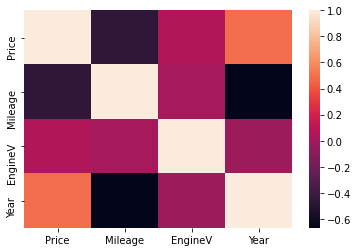

In [6]:
sns.heatmap(data.corr())

It clearly shows that there is a relation b/w   "(Price, Mileage) (Mileage,Year) (Price,Year) "

In [7]:
# descrpitive statistics
data.describe(include="all") # include=all allows even categorical columns..

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


    1. Data has missing values..
    2. Model has 312 unique values, thus implies that we need to create 311 
    dummy variables for model which makes model very hard to understand data.

## Data Preprocessing

In [8]:
## Data Cleaning
data_clean=data.drop("Model",axis=1)

In [9]:
## missing values
data_clean.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

    1. drop null values as it seems there are null values in dependent varaible Price.

In [10]:
# axis=0 for rows and 1 for columns
data_clean_2=data_clean.dropna(axis=0)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      4025.000000
mean      19552.308065
std       25815.734988
min         600.000000
25%        6999.000000
50%       11500.000000
75%       21900.000000
max      300000.000000
Name: Price, dtype: float64

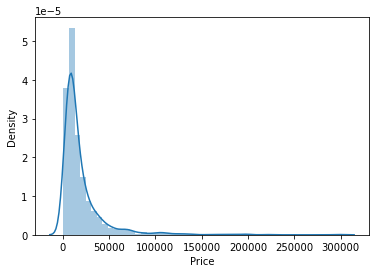

In [11]:
# check for outliers in the data
sns.distplot(data_clean_2['Price'])
data_clean_2['Price'].describe()

price are right skewed and Mean > Median. so Drop top 5% data


In [12]:
data1=data_clean_2[data_clean_2["Price"]<data_clean_2["Price"].quantile(0.95)]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

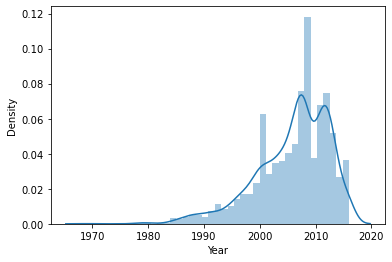

In [13]:
sns.distplot(data1['Year'])

Year is left skewed so remove bottom 5% data. Alterante trim both sides by 2.5%.

In [14]:
data2=data1[data1["Year"]>data_clean_2["Year"].quantile(.025)]
data2=data2[data2["Mileage"]<data["Mileage"].quantile(.975)]

## mean+std of engineV fall for nearly around 7.8
data2=data2[data2["EngineV"]<7.8]

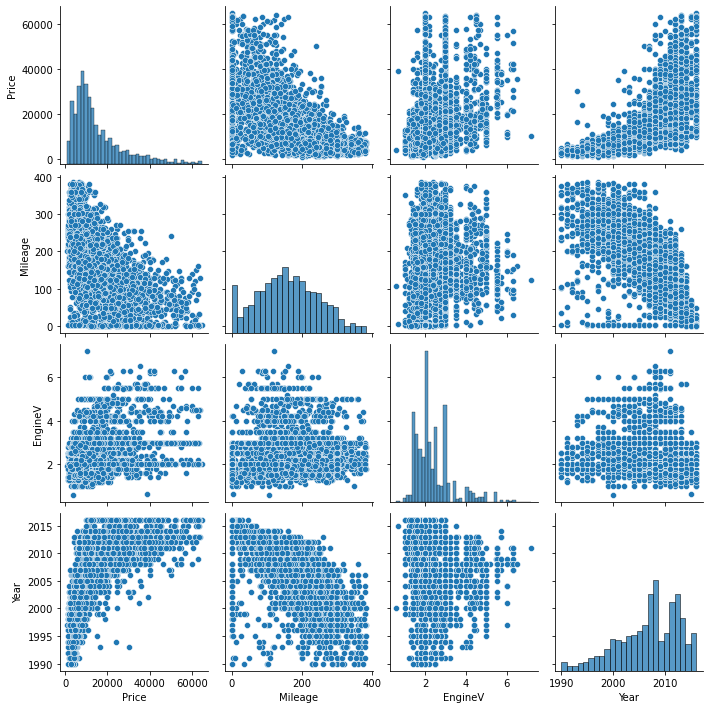

In [15]:
sns.pairplot(data2)

Pair Plot informs, there is no linear relationship. To make it linear use log Transformations.

In [16]:
data2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3616,3616.000000,3616,3616.000000,3616.000000,3616,3616,3616.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,821,NaN,1380,NaN,NaN,1656,3265,NaN
mean,NaN,15489.300971,NaN,162.381361,2.412907,NaN,NaN,2006.699668
std,NaN,12237.757307,NaN,87.570284,0.931739,NaN,NaN,5.608081
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1990.000000
25%,NaN,7300.000000,NaN,99.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,160.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,20000.000000,NaN,224.000000,3.000000,NaN,NaN,2011.000000


## Check for OLS Assumptions..

In [17]:
## Linear Transformations..
data2['price']=np.log(data2['Price'])
data2.drop('Price',axis=1,inplace=True)

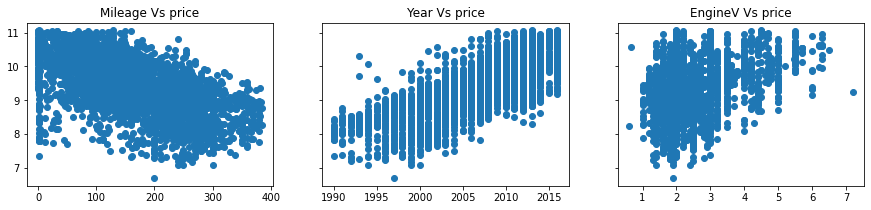

In [18]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data2['Mileage'],data2['price'])
ax1.set_title("Mileage Vs price")
ax2.scatter(data2['Year'],data2['price'])
ax2.set_title("Year Vs price")
ax3.scatter(data2['EngineV'],data2['price'])
ax3.set_title("EngineV Vs price")
plt.show()

In [19]:
## Multi Collinearity...
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data2[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,4.436638,Mileage
1,10.392717,Year
2,7.748388,EngineV


We need to drop Year due to it's multicollinearity...

In [20]:
data2.drop("Year",axis=1,inplace=True)

In [21]:
data_final=pd.get_dummies(data2,drop_first=True)
data_final.head()

,Mileage,EngineV,price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,200,2.7,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [22]:
## Price is log value
cols = ['price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_final[cols]
data_preprocessed.head()

,price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
7,9.560997,200,2.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Linear Regression Model 

In [23]:
y=data_preprocessed['price']
x=data_preprocessed.drop('price',axis=1)

### scale the data

In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x1=scaler.fit_transform(x)

### Trian test split

In [25]:
from sklearn.model_selection import train_test_split as t
x_train,x_test,y_train,y_test=t(x1,y,test_size=0.25,random_state=45)

### Create Regression

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)

LinearRegression()

### r score

In [27]:
model.score(x_train,y_train) ## training
model.score(x_test,y_test)   ## testing

0.7583599085246233

In [28]:
## intercept
model.intercept_

9.353376887284789

In [29]:
## coefficent
model.coef_

array([-0.38388259,  0.18666664,  0.01207939, -0.00629309, -0.13586637,
       -0.17857713, -0.04659552, -0.08137823, -0.14726816, -0.09058187,
       -0.18684163, -0.11183933, -0.15087416, -0.10577227, -0.01718062,
       -0.12762137,  0.32246411])

## testing

In [30]:
y_pred_test = model.predict(x_test)

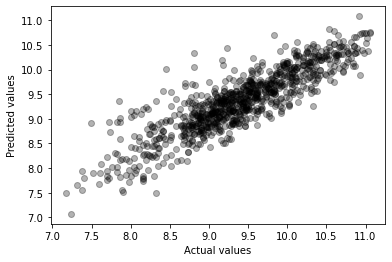

In [31]:
plt.scatter(y_test,y_pred_test,alpha=0.3,color='black')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

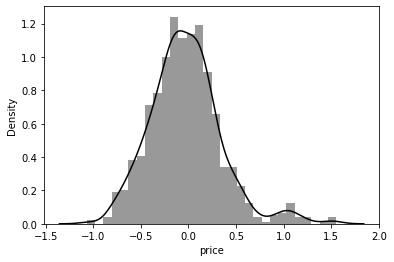

In [32]:
## Residual Plot means predicted-actaul
residual=y_pred_test-y_test
sns.distplot(residual,color='black')

In [33]:
df_pf = pd.DataFrame(np.exp(y_pred_test), columns=['Prediction'])
df_pf.head()
df_pf['Actual']=np.exp(y_test)
df_pf['Residual'] = df_pf['Actual'] - df_pf['Prediction']

In [34]:
## df_pf describes about the predicted, actual , residual
df_pf.describe()

,Prediction,Actual,Residual
count,904.000000,191.000000,191.000000
mean,14166.397073,14976.954607,225.069759
std,9100.227234,11345.986830,14564.766745
min,1174.711860,1389.000000,-39614.902193
25%,7738.353722,7325.000000,-7868.135390
50%,11590.681079,11300.000000,-480.266601
75%,17868.986293,18994.500000,6893.681736
max,64953.605082,52300.000000,39655.365335


1. Include Year,to check whether it's having impact Or not.
2. Optimizie model with help of regualarization Lasso Or Ridge
3. Tip for selecting feture selection by f-regression.( simple linear regreesion b/w a dependent and independent variable That's it)
4. Fill missing values using imputation techniques.
5. Make it an end-to-end project and deploy it.

In [35]:
from sklearn.feature_selection import f_regression
f_regression(x1,y)
## returns f-statistic and p-value
## f-statistic explains significance of each feature the higher it is the better.
## p-value also known as critcal value

(array([1608.01200259,  598.42848352,   16.70682009,   31.06393967,
          14.40410435,  166.7729885 ,  103.88205214,   21.32088716,
          58.9117153 ,   10.72104105,   44.23249459,  112.73105842,
          56.61150692,    7.9496415 ,    2.56095221,   17.25302482,
        1239.38272098]),
 array([3.38829526e-291, 1.99634936e-122, 4.45723423e-005, 2.67929504e-008,
        1.49898066e-004, 2.48036448e-037, 4.53034744e-024, 4.01996789e-006,
        2.10800089e-014, 1.06922086e-003, 3.35511646e-011, 5.93720523e-026,
        6.66397390e-014, 4.83588420e-003, 1.09619998e-001, 3.34741798e-005,
        1.04975202e-233]))